openCVをもちいて数独の問題の画像を取得するテスト

In [5]:
%matplotlib inline

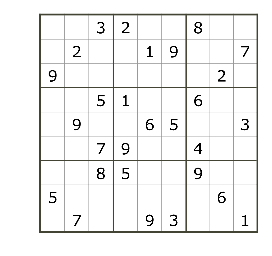

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("sudoku.png")
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

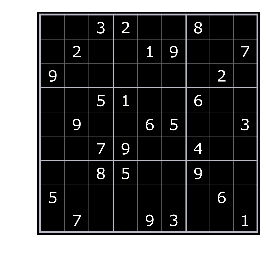

In [7]:
img = 255 - img

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()